<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
product_df = pd.read_csv('/content/drive/MyDrive/R8 Internal Lab Files/product_data.csv') 

In [5]:
product_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
676,B07XJ5RSX3,Motorola,"Motorola Moto E6 Smartphone with 16GB Memory, ...",https://www.amazon.com/Motorola-Moto-Smartphon...,https://m.media-amazon.com/images/I/81X3J941Cy...,5.0000000,https://www.amazon.com/product-reviews/B07XJ5RSX3,1,99.9900000,0.0000000
205,B06XGLHP8V,Apple,"Apple iPhone 7 Plus, GSM Unlocked, 128GB - Ros...",https://www.amazon.com/Apple-iPhone-Plus-Unloc...,https://m.media-amazon.com/images/I/51SEopmY8H...,3.5000000,https://www.amazon.com/product-reviews/B06XGLHP8V,83,288.0000000,0.0000000
679,B07XVNDQMR,OnePlus,OnePlus 6T A6013 Dual Sim 128GB/8GB (Mirror Bl...,https://www.amazon.com/OnePlus-A6013-128GB-Mir...,https://m.media-amazon.com/images/I/61aFHNJdl9...,4.4000000,https://www.amazon.com/product-reviews/B07XVNDQMR,31,339.9500000,0.0000000
41,B00CEKXJ3Y,Samsung,"Samsung Galaxy S4, Black Mist 16GB (Sprint)",https://www.amazon.com/Samsung-Galaxy-S4-Black...,https://m.media-amazon.com/images/I/71s9fDfT7U...,3.5000000,https://www.amazon.com/product-reviews/B00CEKXJ3Y,561,0.0000000,0.0000000
278,B074VFRKZG,Motorola,Motorola Moto X4 Factory Unlocked Phone - 32GB...,https://www.amazon.com/Motorola-Moto-Factory-U...,https://m.media-amazon.com/images/I/7159Jihtgg...,4.1000000,https://www.amazon.com/product-reviews/B074VFRKZG,184,261.8400000,0.0000000


In [6]:
review_df = pd.read_csv('/content/drive/MyDrive/R8 Internal Lab Files/reviews.csv')

In [7]:
review_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
22597,B01D53A7KG,Jerome Sebrasky,5,"May 17, 2017",True,Five Stars,Love it....,nan
5718,B00CGIULGC,Katie R. Baker,3,"November 6, 2015",True,I like the phone but,"I like the phone but, I just received the phon...",3.0000000
917,B0046REOWS,TLM,4,"October 30, 2011",False,I am a 6 year user of Net10,I am shocked to read the one star reviews abou...,14.0000000
21613,B01CYYYRNK,KM,5,"April 14, 2018",True,Just what I need at a good price.,I needed to replace my edge 6 but wasn't looki...,2.0000000
32330,B06XS2GWFC,luis pagan,5,"June 9, 2017",True,Five Stars,Excellent phone,5.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [8]:
product_df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [9]:
product_dff = product_df.drop(columns=['url','image','reviewUrl'])
product_dff.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [10]:
product_dff.describe()

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


In [11]:
product_dff.describe(include='object')

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B01J63ODA4,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..."
freq,1,346,2


In [12]:
review_df[review_df['helpfulVotes']==990]

,asin,name,rating,date,verified,title,body,helpfulVotes
24467,B01GXAT0CE,Jake,1,"May 1, 2017",True,It seems like it has been stolen,"The product came in a beaten up box, came lock...",990.0000000


In [13]:
review_df.describe(include='object')

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

- We have details of 720 items/products. The top brand is Samsung
- There are no duplicate asin id 
- To title is Apple iphone 6s
- Rating ranges from 1 to 5. Mean rating is 3.71
- Price ranges from 0 to 999.99 with 235 as mean price value
- There is negative review with 990 helpful votes, we can analyse it in more detail


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

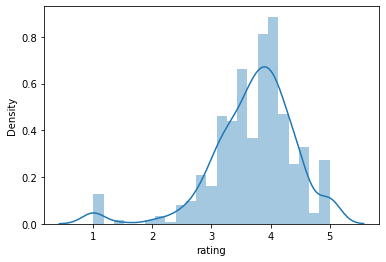

In [14]:
sns.distplot(product_dff['rating']);

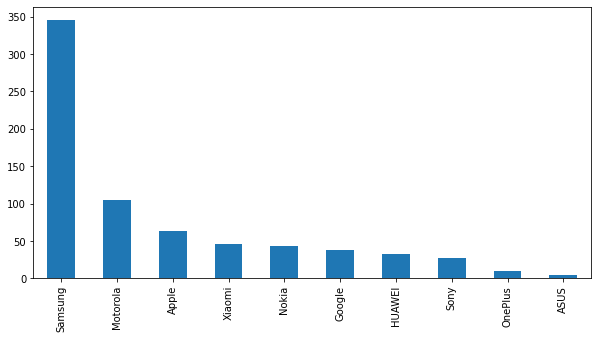

In [15]:
product_dff['brand'].value_counts().plot(kind='bar',figsize = (10,5));

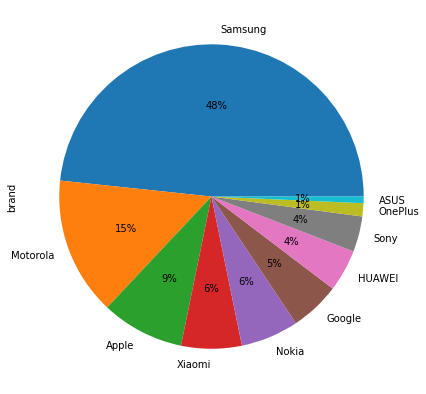

In [16]:
product_dff['brand'].value_counts().plot(kind='pie', autopct = '%1.0f%%', figsize = (12,7));

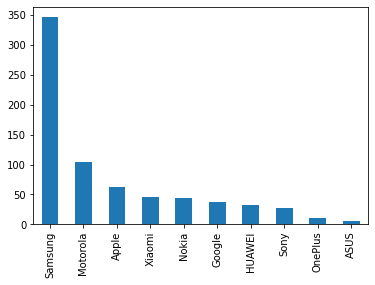

In [17]:
product_dff['brand'].value_counts().plot(kind='bar');

### 4.5 Display average rating per brand

In [18]:
product_dff.sample(5)

,asin,brand,title,rating,totalReviews,price,originalPrice
101,B010CK8O9Q,Sony,"Sony Xperia Z3 Plus E6533 32GB Black 3G/4G, Du...",3.1000000,4,0.0000000,0.0000000
131,B01CYYYRNK,Samsung,Samsung Galaxy S7 SM-G930A AT&T Unlocked Smart...,3.1000000,394,248.7000000,0.0000000
525,B07NP2Y82Q,Motorola,"Motorola Moto G7+ Plus (64GB, 4GB RAM) Dual SI...",4.1000000,125,202.9900000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,3.1000000,12,149.9900000,0.0000000
594,B07R5ZYR77,Xiaomi,Xiaomi Mi 9 128GB + 6GB RAM - 48MP Ultra High ...,4.7000000,56,387.0000000,0.0000000


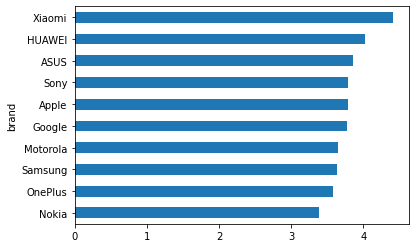

In [19]:
product_dff.groupby(by='brand')['rating'].mean().sort_values().plot(kind='barh');

### 4.6 Display average price per brand

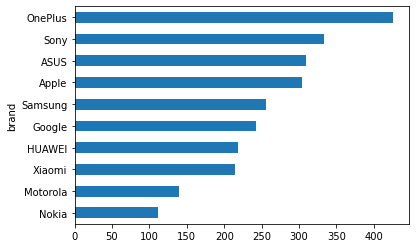

In [20]:
product_dff.groupby(by='brand')['price'].mean().sort_values().plot(kind='barh');

### 4.7 Display average 'totalReviews' per brand

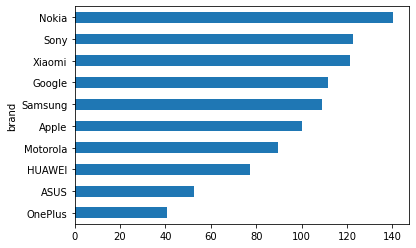

In [21]:
product_dff.groupby(by='brand')['totalReviews'].mean().sort_values().plot(kind='barh');

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [22]:
review_df.head(2)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000


In [23]:
review_df.shape

(67986, 8)

In [24]:
dff = pd.merge(review_df,product_dff,how='left',on='asin')
dff.shape

(67986, 14)

In [25]:
dff.head(2)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


In [26]:
df = pd.merge(review_df, product_dff, how='left',left_on='asin',right_on='asin')
df.shape

(67986, 14)

In [27]:
df.head(2)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [28]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title","title_y": "item_title","rating_y":"overall_rating"},inplace=True)
df.head(2)


,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [29]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [30]:
dff = df[df.verified==True]
dff.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

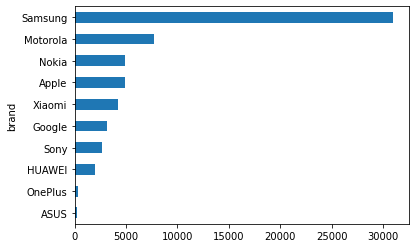

In [31]:
dff.groupby(by='brand')['totalReviews'].count().sort_values().plot(kind='barh');

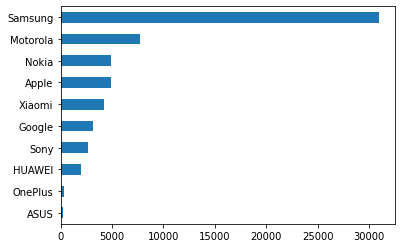

In [32]:
#Another way of identifying the top review brand
dff['brand'].value_counts().sort_values().plot(kind='barh');

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [33]:
df_final = dff[['brand','body','price','user_rating','review_title']]
df_final.head(2)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

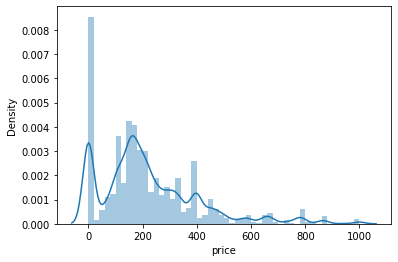

In [34]:
sns.distplot(df_final.price);

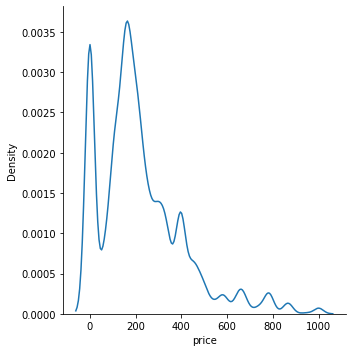

In [35]:
sns.displot(df_final['price'], kind = 'kde');

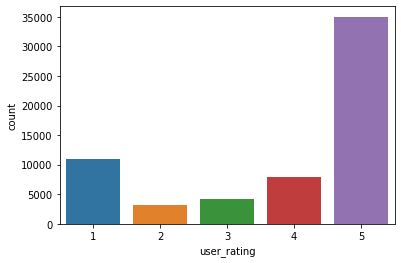

In [36]:
sns.countplot(df_final['user_rating']);

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [37]:
df_final['sentiment'] =  df_final['user_rating'].apply(lambda x:1 if x > 3 else 0)

### 4.15 Check frequency distribution of the 'sentiment'

In [38]:
df_final['sentiment'].value_counts()

1    42939
0    18286
Name: sentiment, dtype: int64

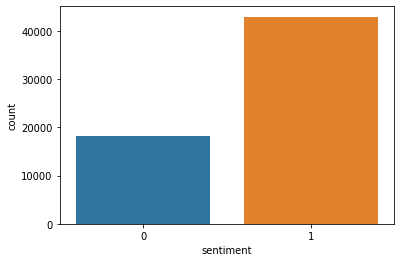

In [39]:
sns.countplot(df_final.sentiment);

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

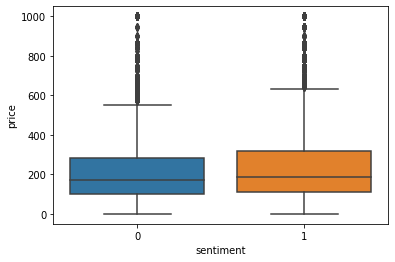

In [40]:
sns.boxplot(df_final.sentiment,df_final.price);

In [41]:
pd.crosstab(df_final.brand,df_final.sentiment).apply(lambda r : r/r.sum(),axis=1)

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [42]:
df_final.dtypes

brand            object
body             object
price           float64
user_rating       int64
review_title     object
sentiment         int64
dtype: object

In [43]:
df_final['body'].astype('str').head(2)

14                             DON'T BUY OUT OF SERVICE
17    1 star because the phones locked so I have to ...
Name: body, dtype: object

In [44]:
df_final['body'].astype('string').head(2)

14                             DON'T BUY OUT OF SERVICE
17    1 star because the phones locked so I have to ...
Name: body, dtype: string

In [45]:
# df['text'] = df['body'].str.lower()
# df['text'].head()
#---------------------------------------------------------------------
# df_final['text'] = df_final['body'].astype('str')
# df_final['text'] = df_final['text'].apply(lambda x:x.lower())

#----------------------------------------------------------------------
# To change the dataype to string

# df_final['text'] = df_final['text'].astype('string')
# df_final['text'].head()

In [46]:
df_final['text'] = df_final['body'].astype('string')
df_final['text'] = df_final['text'].str.lower()

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [47]:
#^removes everything except \w=> [A-Za-z0-9_] and \s retains white spaces
df_final['text'] = df_final['text'].str.replace('[^\w\s]','')

In [48]:
# second method
# import string
# df_final['keywords'] =  df_final['keywords'].str.translate(str.marketrans("","",string.punctuation))

In [49]:
df_final['text'].head()

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: text, dtype: string

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [50]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
# stopwords = stopwords.words('english')
# stopwords
stop_words = set(stopwords.words('english'))

In [52]:
df_final['text'] = df_final['text'].astype('str')
df_final['text'] = df_final['text'].apply(lambda words: ' '.join(w for w in words.split() if w not in stop_words))
df_final['text'].head()

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: text, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [53]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [54]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [55]:
lemmatizer.lemmatize("rocksssss")

'rock'

In [56]:
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [57]:
df_final['lemm'] = df_final['text'].apply(lemmatize_text)
df_final['lemm'].head(2)

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
Name: lemm, dtype: object

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [69]:
#Optional
from collections import Counter
cnt = Counter()
for text in df_final["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

In [70]:
rare_words = 10
cnt.most_common()[:-rare_words-1:1]

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566),
 ('works', 7464),
 ('would', 7317),
 ('love', 7215),
 ('camera', 7079),
 ('price', 6133),
 ('phones', 6070),
 ('work', 6046),
 ('im', 5861),
 ('really', 5641),
 ('time', 5489),
 ('dont', 5320),
 ('samsung', 5315),
 ('even', 5111),
 ('well', 5001),
 ('bought', 4938),
 ('life', 4899),
 ('got', 4848),
 ('sim', 4809),
 ('buy', 4526),
 ('card', 4516),
 ('back', 4500),
 ('fast', 4382),
 ('quality', 4244),
 ('also', 4211),
 ('still', 4169),
 ('came', 4118),
 ('better', 4104),
 ('used', 4100),
 ('ive', 3961),
 ('product', 3867),
 ('much', 3864),
 ('2', 3770),
 ('far', 3682),
 ('nice', 3679),
 ('day', 3631),
 ('apps', 3559),
 ('verizon', 3546),
 ('android', 3515),
 ('everything', 3457),
 ('best', 3264),
 ('unlocked', 3246),
 ('first', 3244),
 ('cant', 3237),
 ('charger', 3213),
 ('doesnt', 3193),
 ('could', 3169),
 ('

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [59]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2))

In [60]:
tfidf = tfidf_vectorizer.fit_transform(df_final['text'])

In [61]:
tfidf.get_shape()

(61225, 38369)

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [62]:
y = df_final['sentiment']

### 5.9 Split the data into Train & Test Sets

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)

In [71]:
print("Train Accuracy : ",rf_clf1.score(X_train, y1_train))
print("Test Accuracy : ",rf_clf1.score(X_test, y1_test))

Train Accuracy :  0.9958699862332875
Test Accuracy :  0.8881206445993032


In [65]:
#TRAIN
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y1_pred)

array([[12639,   161],
       [   16, 30041]])

In [67]:
#TEST
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)

array([[ 4042,  1444],
       [  611, 12271]])

## 7. Write your conclusion

###We loaded the data successfully and performed exploratory data analysis based on which we further built the model where we made the inferences using body and review comments/texts, and predicted an overall test accuracy at 88.81 and train accuracy at 99.58. The gap between train and test scores shows that the model is overfit and there are various ways to set the right tuning, briefly w.r.t to this data set, we can drop more poisitve review in order to maintain equal distribution of data as data imbalance majorly caused the model to overfit. Then, we can remove rare words in order to get rid of noise in the data. Also, we can finally perform hyper parameter tuning in the vectorizer and model.

###That said, we can also build two seperate models, one for long review and one for short review in order to get more efficient results as highly likely a pattern can be observed by following such industrial methodologies.

##Thank you.

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models